<a href="https://colab.research.google.com/github/SubhikshaKarna/Deep_Learning/blob/main/DCGAN_X_rays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download tawsifurrahman/tuberculosis-tb-chest-xray-dataset

Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset
License(s): copyright-authors
100% 662M/663M [00:33<00:00, 14.9MB/s]
100% 663M/663M [00:33<00:00, 20.8MB/s]


In [ ]:
!unzip tuberculosis-tb-chest-xray-dataset.zip

Archive:  tuberculosis-tb-chest-xray-dataset.zip
  inflating: TB_Chest_Radiography_Database/Normal.metadata.xlsx  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-10.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-100.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1000.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1001.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1002.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1003.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1004.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1005.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1006.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1007.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1008.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1009.png  
  infla

In [ ]:
import pandas as pd
import tensorflow as tf
import shutil
import numpy as np
import glob

In [ ]:
normal_images = glob.glob("TB_Chest_Radiography_Database/Normal/*")
print(f"Normal images: {len(list(normal_images))}")

tb_images = glob.glob("TB_Chest_Radiography_Database/Tuberculosis/*")
print(f"TB images: {len(list(tb_images))}")


Normal images: 3500
TB images: 700


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
from tqdm.notebook import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, array_to_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryFocalCrossentropy

warnings.filterwarnings('ignore')

In [ ]:
image_paths = []
for image_path in tb_images:
    image_paths.append(image_path)
print(image_paths)

['TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-265.png', 'TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-692.png', 'TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-574.png', 'TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-229.png', 'TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-84.png', 'TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-152.png', 'TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-78.png', 'TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-72.png', 'TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-154.png', 'TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-335.png', 'TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-113.png', 'TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-507.png', 'TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-8.png', 'TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-336.png', 'TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-396.png',

In [ ]:
len(image_paths)

700

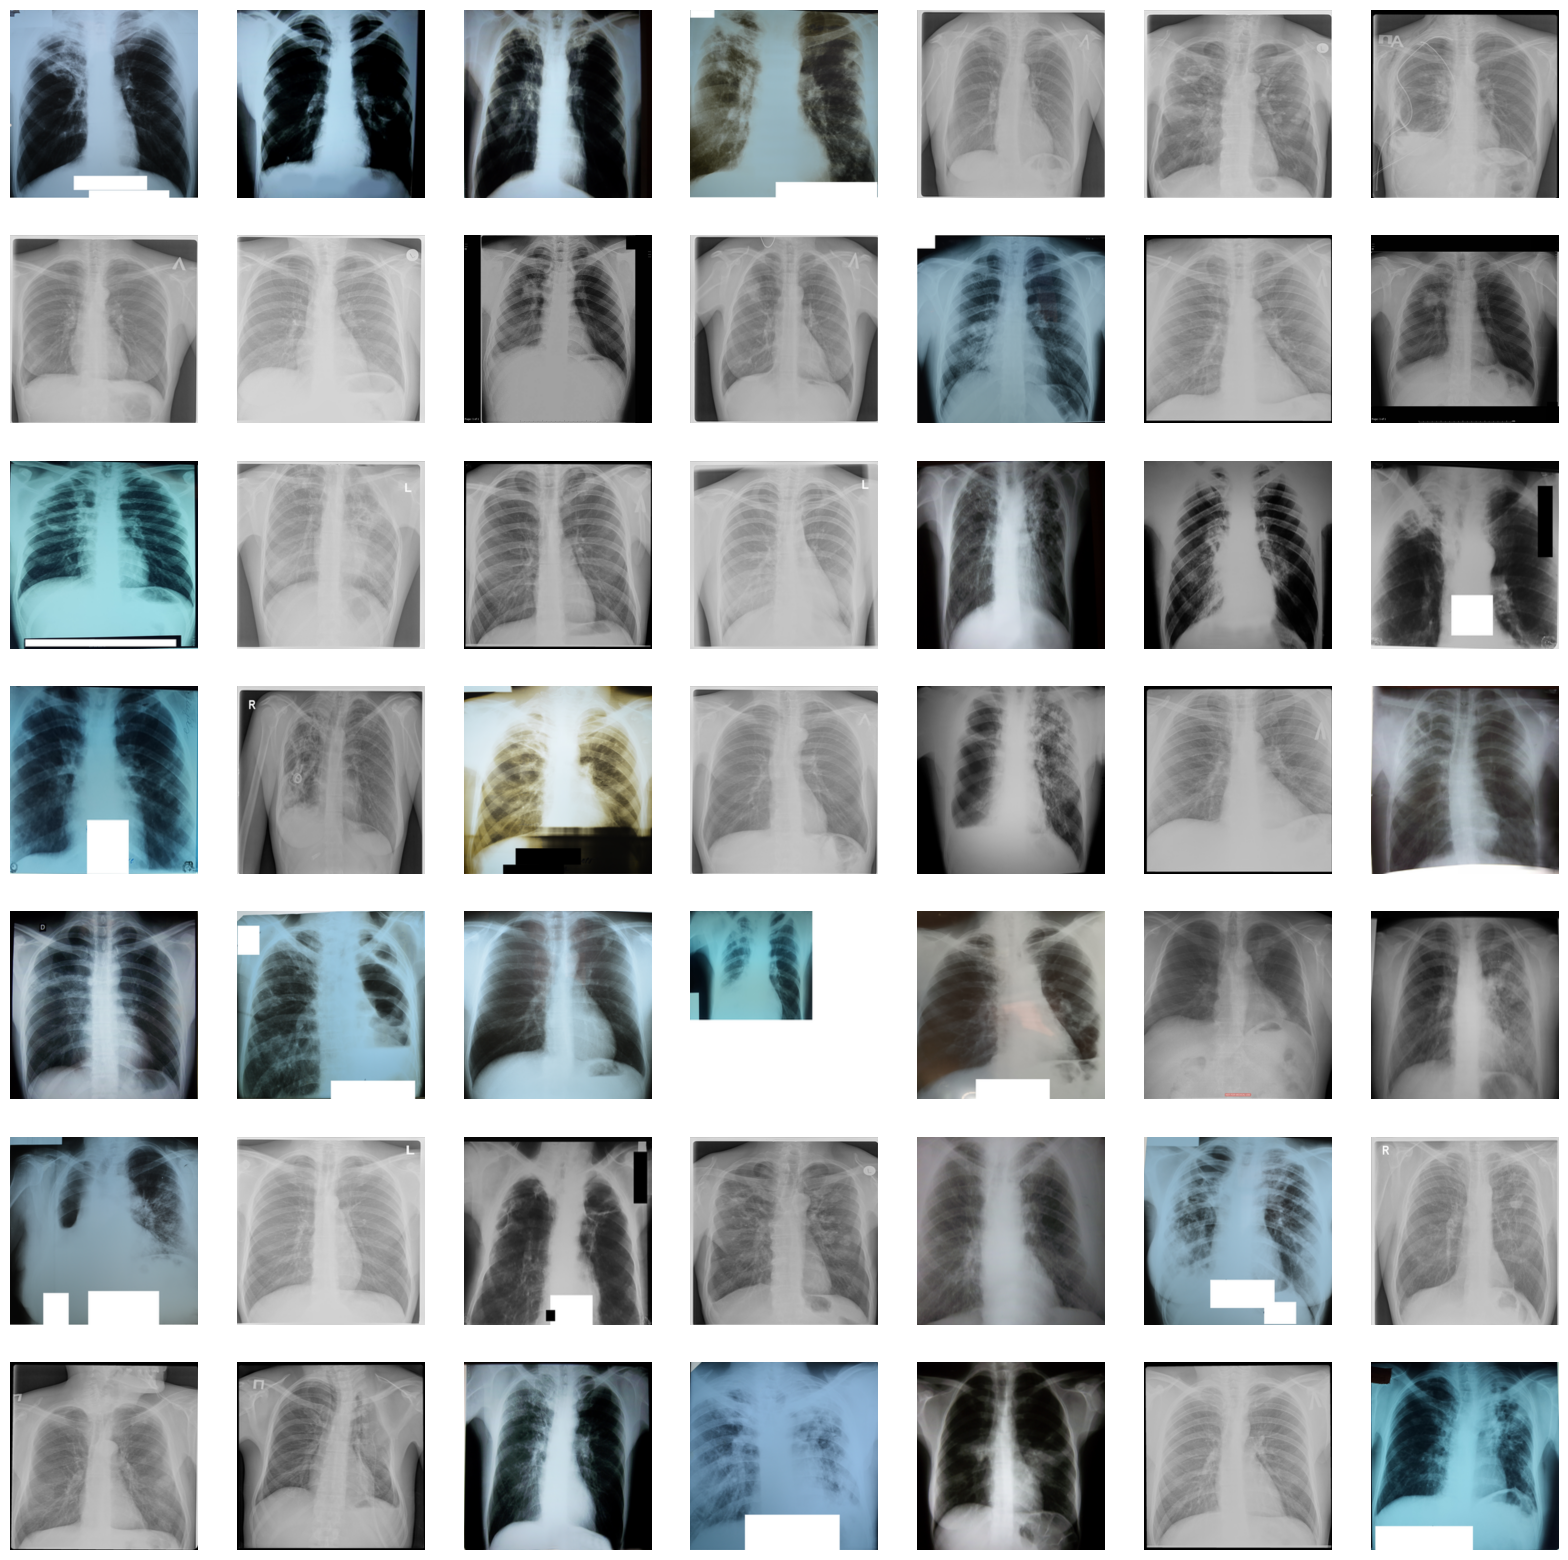

In [ ]:
#To display Grid of images (7x7)
plt.figure(figsize=(20,20))
temp_images=image_paths[:49]
index=1
for image_path in temp_images:
  plt.subplot(7,7,index)
  #Loading the Immage
  img=load_img(image_path)
  #Convert to numpy array
  img=np.array(img)
  #Show the image
  plt.imshow(img)
  plt.axis('off')
  #increament the axis
  index+=1

In [ ]:
#preprocess the image
#load the Image and convert to numpy array
train_images=[np.array(load_img(path)) for path in tqdm(image_paths)]
train_images=np.array(train_images)

  0%|          | 0/700 [00:00<?, ?it/s]

In [ ]:
train_images.shape

(700, 512, 512, 3)

In [ ]:
train_images[0].shape

(512, 512, 3)

In [ ]:
#Reshape the array
train_images=train_images.reshape(train_images.shape[0],512,512,3).astype('float32')

In [ ]:
#Normalize the Image
train_images=(train_images-127.5)/127.5

In [ ]:
train_images[0]

array([[[-0.06666667, -0.01176471,  0.09019608],
        [-0.05098039,  0.03529412,  0.16078432],
        [-0.01960784,  0.12156863,  0.29411766],
        ...,
        [ 0.07450981,  0.2784314 ,  0.4509804 ],
        [ 0.07450981,  0.28627452,  0.4509804 ],
        [ 0.07450981,  0.28627452,  0.4509804 ]],

       [[-0.16078432, -0.10588235, -0.00392157],
        [-0.13725491, -0.05882353,  0.05882353],
        [-0.09803922,  0.02745098,  0.18431373],
        ...,
        [ 0.07450981,  0.2784314 ,  0.45882353],
        [ 0.07450981,  0.28627452,  0.45882353],
        [ 0.07450981,  0.28627452,  0.45882353]],

       [[-0.33333334, -0.29411766, -0.18431373],
        [-0.30980393, -0.25490198, -0.12941177],
        [-0.27058825, -0.1764706 , -0.01960784],
        ...,
        [ 0.08235294,  0.28627452,  0.46666667],
        [ 0.08235294,  0.29411766,  0.46666667],
        [ 0.08235294,  0.29411766,  0.46666667]],

       ...,

       [[-0.8039216 , -0.8039216 , -0.79607844],
        [-0

#Create Generator and Discriminator

In [ ]:
#Latent dimension for random noise
LATENT_DIM=100
#weight intializer
WEIGHT_INIT=keras.initializers.RandomNormal(mean=0.0,stddev=0.02)
#no. of channels of the image
CHANNELS=3

In [ ]:
#Generator Model
model=Sequential(name='generator')

#1d Random noise
model.add(layers.Dense(8*8*512,input_dim=LATENT_DIM))
#model.add(layers.BatchNormalization())
model.add(layers.ReLU())

#Convert 1d to 3d
model.add(layers.Reshape((8,8,512)))

#upsample to 16X16
model.add(layers.Conv2DTranspose(256,(4,4),strides=(2,2),padding='same',kernel_initializer=WEIGHT_INIT))
#model.add(layers.BatchNormalization())
model.add(layers.ReLU())

#upsample to 32X32
model.add(layers.Conv2DTranspose(128,(4,4),strides=(2,2),padding='same',kernel_initializer=WEIGHT_INIT))
#model.add(layers.BatchNormalization())
model.add(layers.ReLU())

#upsample to 64X64
model.add(layers.Conv2DTranspose(64,(4,4),strides=(2,2),padding='same',kernel_initializer=WEIGHT_INIT))
#model.add(layers.BatchNormalization())
model.add(layers.ReLU())

# Upsample to 128X128
model.add(layers.Conv2DTranspose(32, (4, 4), strides=(2, 2), padding='same', kernel_initializer=WEIGHT_INIT))
#model.add(layers.BatchNormalization())
model.add(layers.ReLU())

# Upsample to 256x256
model.add(layers.Conv2DTranspose(16, (4, 4), strides=(2, 2), padding='same', kernel_initializer=WEIGHT_INIT))
#model.add(layers.BatchNormalization())
model.add(layers.ReLU())

# Upsample to 512x512
model.add(layers.Conv2DTranspose(8, (4, 4), strides=(2, 2), padding='same', kernel_initializer=WEIGHT_INIT))
#model.add(layers.BatchNormalization())
model.add(layers.ReLU())

# Final layer to get the desired output shape with 3 channels (RGB)
model.add(layers.Conv2D(CHANNELS, (4, 4), padding='same', activation='tanh'))

# Assign to generator and print summary
generator = model
generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32768)             3309568   
                                                                 
 re_lu (ReLU)                (None, 32768)             0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 512)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 16, 16, 256)       2097408   
 anspose)                                                        
                                                                 
 re_lu_1 (ReLU)              (None, 16, 16, 256)       0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 32, 32, 128)       524416    
 Transpose)                                              

In [ ]:
#Discriminator
model=Sequential(name='discriminator')
input_shape=(512,512,3)
alpha=0.2

#Create conv layers
# First convolutional layer
model.add(layers.Conv2D(64, (4, 4), strides=(2, 2), padding='same', input_shape=input_shape))
model.add(layers.LeakyReLU(alpha=alpha))

# Second convolutional layer
model.add(layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=alpha))

# Third convolutional layer
model.add(layers.Conv2D(256, (4, 4), strides=(2, 2), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=alpha))

# Fourth convolutional layer
model.add(layers.Conv2D(512, (4, 4), strides=(2, 2), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=alpha))

model.add(layers.Flatten())
model.add(layers.Dropout(0.3))

#output Class
model.add(layers.Dense(1,activation='sigmoid'))
discriminator = model
discriminator.summary()


Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      3136      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256, 256, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     131200    
                                                                 
 batch_normalization (Batch  (None, 128, 128, 128)     512       
 Normalization)                                                  
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128, 128, 128)     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 256)       524544    
                                                     

Create DCGAN

In [ ]:
class DCGAN(keras.Model):
  def __init__(self,generator,discriminator,latent_dim):
    super().__init__()
    self.generator=generator
    self.discriminator=discriminator
    self.latent_dim=latent_dim
    self.g_loss_metric=keras.metrics.Mean(name='g_loss')
    self.d_loss_metric=keras.metrics.Mean(name='d_loss')

  @property
  def metrics(self):
    return[self.g_loss_metric,self.d_loss_metric]

  def compile(self,g_optimizer,d_optimizer,loss_fn):
    super(DCGAN,self).compile()
    self.g_optimizer=g_optimizer
    self.d_optimizer=d_optimizer
    self.loss_fn=loss_fn

  def train_step(self,real_images):
    #get batch size from the data
    batch_size=tf.shape(real_images)[0]
    random_noise=tf.random.normal(shape=(batch_size,self.latent_dim))

    with tf.GradientTape() as tape:
      pred_real=self.discriminator(real_images,training=True)

      real_labels=tf.ones((batch_size,1))
      real_labels+=0.05*tf.random.uniform(tf.shape(real_labels))
      d_loss_real=self.loss_fn(real_labels,pred_real)

      fake_images=self.generator(random_noise)
      pred_fake=self.discriminator(fake_images,training=True)

      fake_labels=tf.zeros((batch_size,1))
      d_loss_fake=self.loss_fn(fake_labels,pred_fake)

      d_loss=(d_loss_real + d_loss_fake)/2

    gradients=tape.gradient(d_loss, self.discriminator.trainable_variables)

    self.d_optimizer.apply_gradients(zip(gradients,self.discriminator.trainable_variables))


    labels=tf.ones((batch_size,1))

    with tf.GradientTape() as tape:
      fake_images=self.generator(random_noise,training=True)

      pred_fake=self.discriminator(fake_images,training=True)

      g_loss=self.loss_fn(labels,pred_fake)


    gradients=tape.gradient(g_loss, self.generator.trainable_variables)

    self.g_optimizer.apply_gradients(zip(gradients,self.generator.trainable_variables))


    self.d_loss_metric.update_state(d_loss)
    self.g_loss_metric.update_state(g_loss)

    return {'d_loss':self.d_loss_metric.result(),'g_loss':self.g_loss_metric.result()}


In [ ]:
class DCGANMonitor(keras.callbacks.Callback):
  def __init__(self,num_imgs=25,latent_dim=100):
    self.num_imgs=num_imgs
    self.latent_dim=latent_dim

    self.noise=tf.random.normal([25,latent_dim])

  def on_epoch_end(self,epoch,logs=None):
    g_img=self.model.generator(self.noise)
    g_img=(g_img * 127.5)+127.5
    g_img.numpy()

    fig=plt.figure(figsize=(8,8))
    for i in range(self.num_imgs):
      plt.subplot(5,5,i+1)
      img=array_to_img(g_img[i])
      plt.imshow(img)
      plt.axis('off')

    plt.show()

  def on_train_end(self,logs=None):
    self.model.generator.save('generator.h5')


In [ ]:
dcgan=DCGAN(generator=generator,discriminator=discriminator,latent_dim=LATENT_DIM)

In [ ]:
D_LR=0.0001
G_LR=0.0003
dcgan.compile(g_optimizer=Adam(learning_rate=G_LR,beta_1=0.5),d_optimizer=Adam(learning_rate=D_LR,beta_1=0.5),loss_fn=BinaryFocalCrossentropy())

Epoch 1/600
22/22 [==============================] - ETA: 0s - d_loss: 0.1552 - g_loss: 10.2178

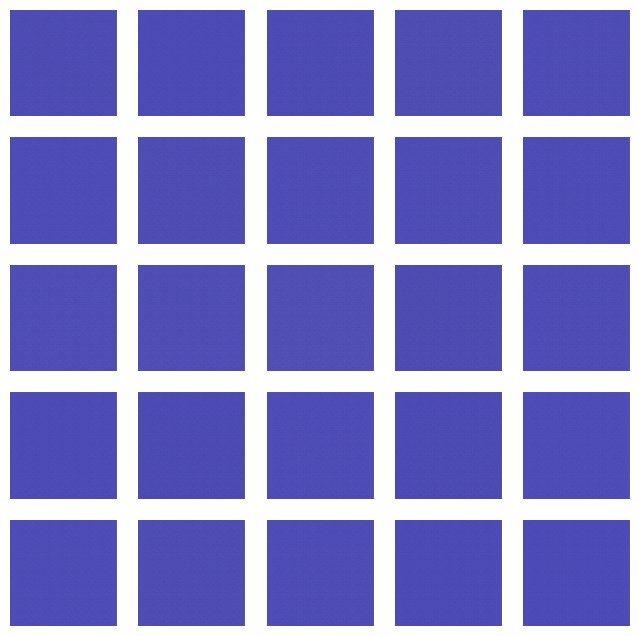

22/22 [==============================] - 34s 781ms/step - d_loss: 0.1552 - g_loss: 10.2178
Epoch 2/600
22/22 [==============================] - ETA: 0s - d_loss: 0.1956 - g_loss: 42.7927

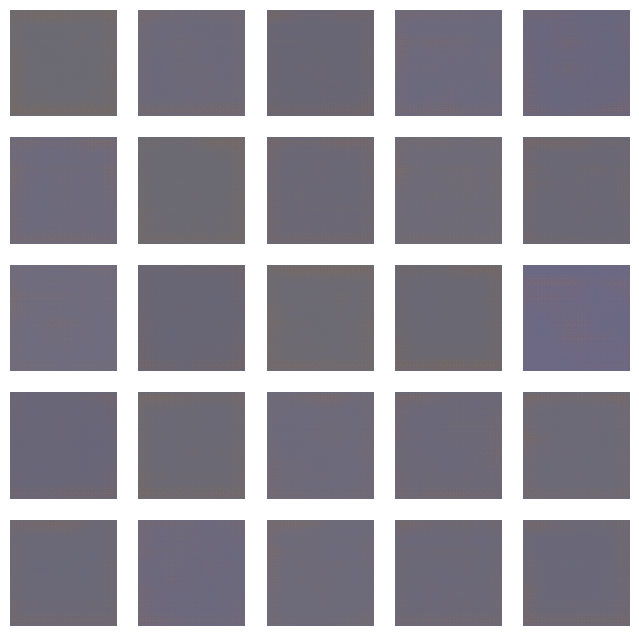

22/22 [==============================] - 5s 221ms/step - d_loss: 0.1956 - g_loss: 42.7927
Epoch 3/600
22/22 [==============================] - ETA: 0s - d_loss: 0.1620 - g_loss: 31.9413

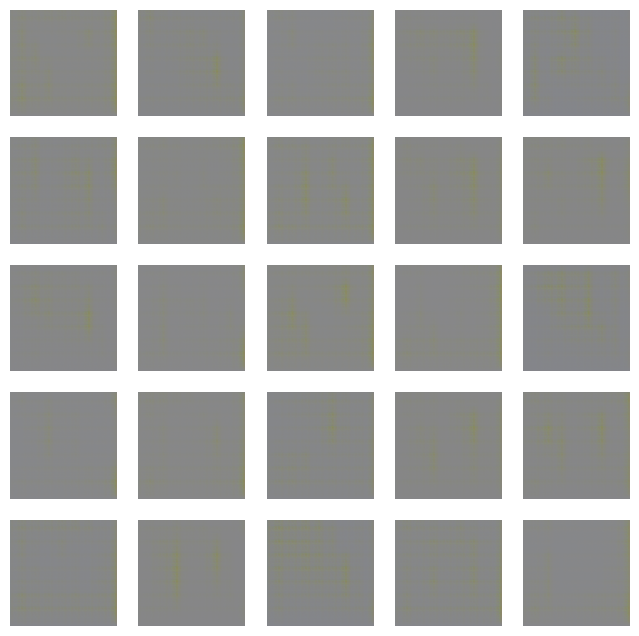

22/22 [==============================] - 5s 221ms/step - d_loss: 0.1620 - g_loss: 31.9413
Epoch 4/600
22/22 [==============================] - ETA: 0s - d_loss: 0.1582 - g_loss: 37.6312

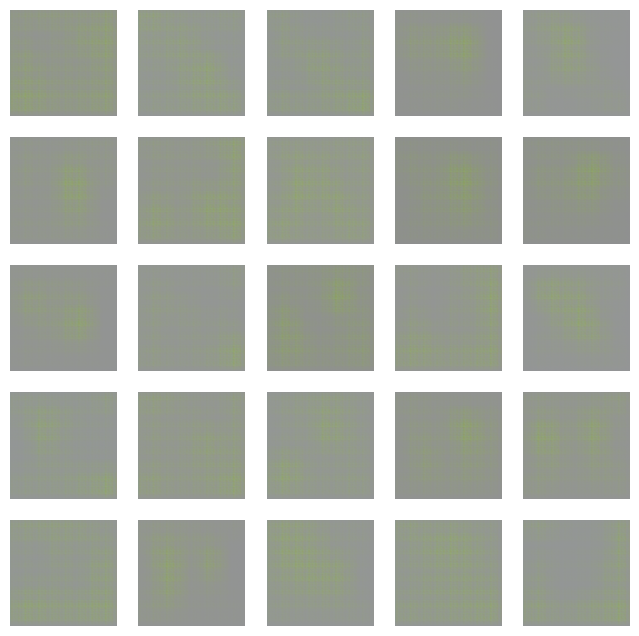

22/22 [==============================] - 5s 237ms/step - d_loss: 0.1582 - g_loss: 37.6312
Epoch 5/600
22/22 [==============================] - ETA: 0s - d_loss: 0.1083 - g_loss: 38.2534

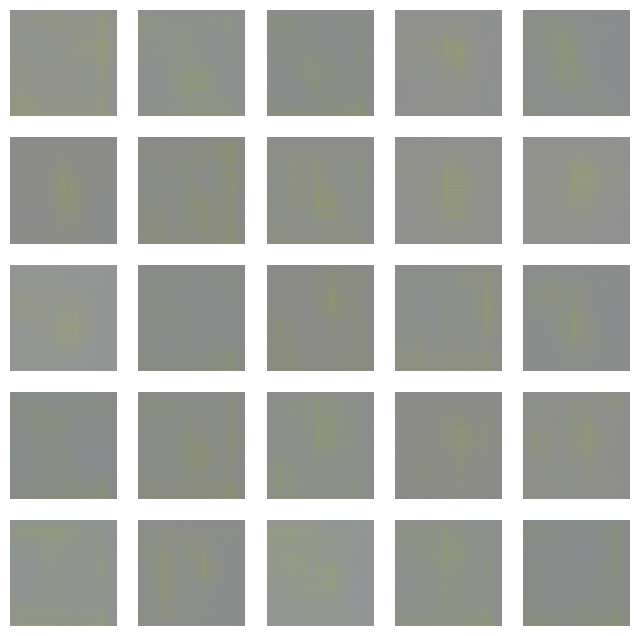

22/22 [==============================] - 5s 220ms/step - d_loss: 0.1083 - g_loss: 38.2534
Epoch 6/600
22/22 [==============================] - ETA: 0s - d_loss: 0.0427 - g_loss: 34.0800

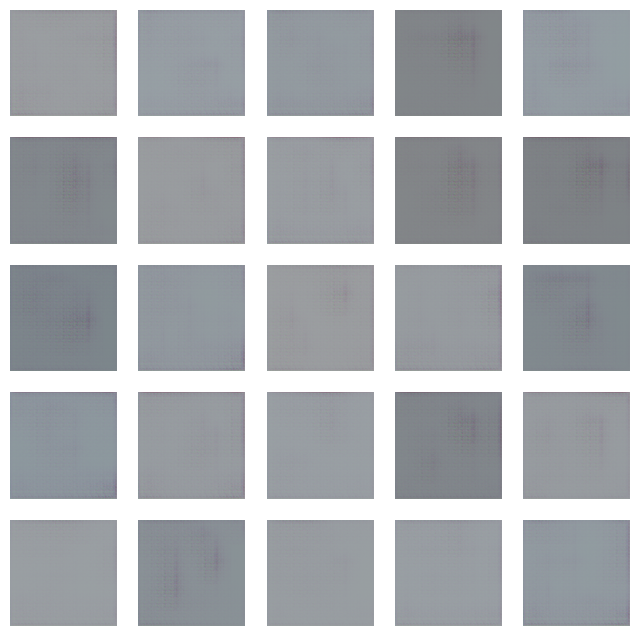

22/22 [==============================] - 5s 219ms/step - d_loss: 0.0427 - g_loss: 34.0800
Epoch 7/600
22/22 [==============================] - ETA: 0s - d_loss: 0.0918 - g_loss: 35.7540

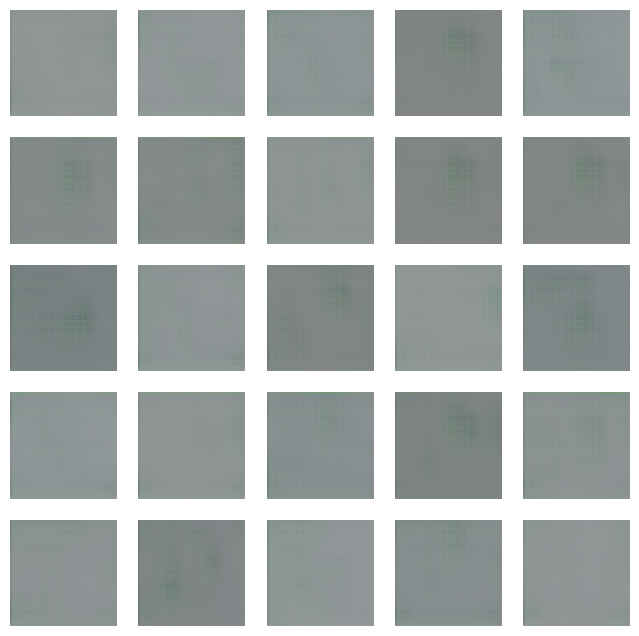

22/22 [==============================] - 5s 235ms/step - d_loss: 0.0918 - g_loss: 35.7540
Epoch 8/600
22/22 [==============================] - ETA: 0s - d_loss: 0.1621 - g_loss: 32.7792

In [ ]:
N_EPOCHS=600
dcgan.fit(train_images,epochs=N_EPOCHS,callbacks=[DCGANMonitor()])

1/1 [==============================] - 1s 1s/step


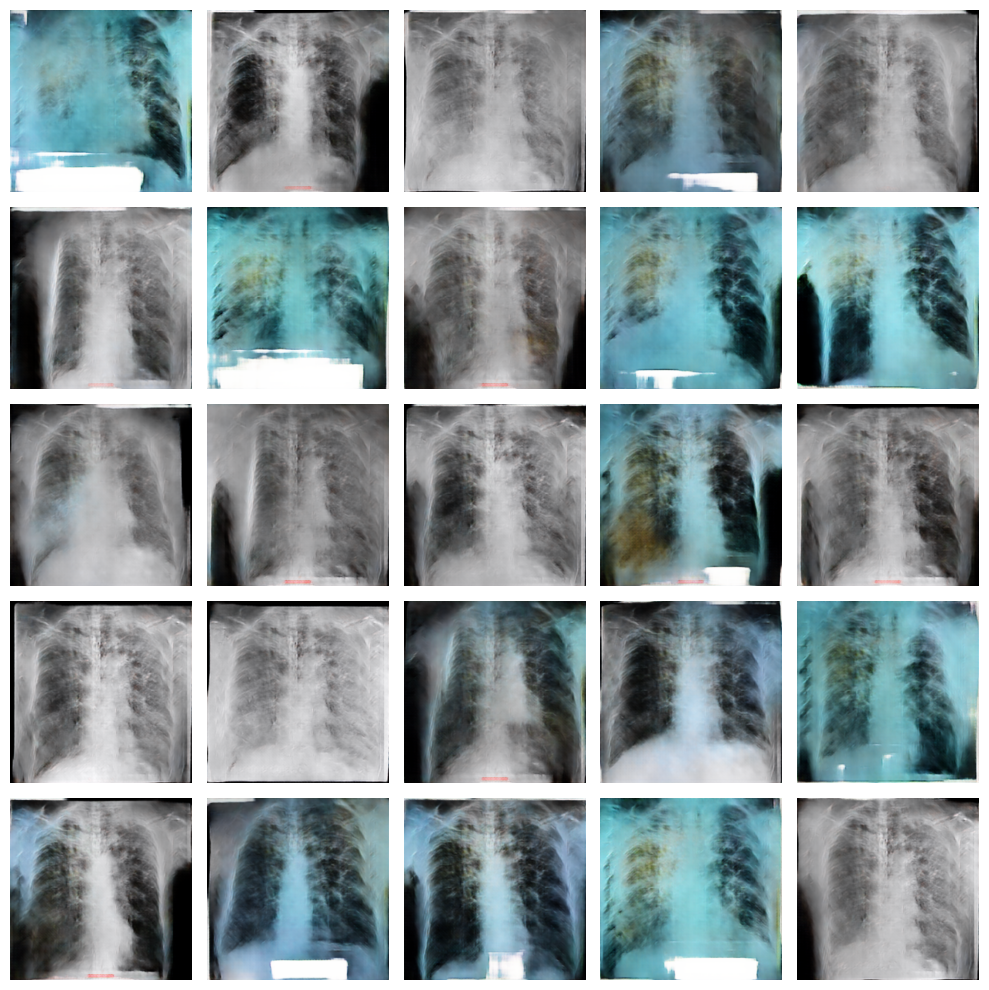

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.models import load_model

# Load the trained generator model
generator = load_model('generator.h5')

# Function to generate and display images
def generate_images(generator, latent_dim, num_images=25):
    # Generate random noise
    random_noise = np.random.normal(0, 1, (num_images, latent_dim))

    # Generate images from the random noise
    generated_images = generator.predict(random_noise)

    # Rescale images from [-1, 1] to [0, 255]
    generated_images = (generated_images * 127.5) + 127.5

    # Plot the generated images
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i+1)
        img = array_to_img(generated_images[i])
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Generate and display images
generate_images(generator, LATENT_DIM)

